# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import requests
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [77]:
#DOWNLOAD DATA
df = pd.read_csv('https://raw.githubusercontent.com/jz3309/PUI2018_jz3309/master/HW9_jz3309/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
df.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [78]:
ms = pd.read_csv('data-pvLFI.csv')
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [79]:

pop = pd.read_csv('https://raw.githubusercontent.com/jz3309/PUI2018_jz3309/master/HW9_jz3309/API_SP.POP.TOTL_DS2_en_csv_v2.csv')
pop.head()

,Country Name,Country Code,2012
0,Aruba,ABW,102577.0
1,Afghanistan,AFG,30696958.0
2,Angola,AGO,25096150.0
3,Albania,ALB,2900401.0
4,Andorra,AND,82431.0


In [80]:
gdp = pd.read_csv('https://raw.githubusercontent.com/jz3309/PUI2018_jz3309/master/HW9_jz3309/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv')
gdp.head()

,Country Name,Country Code,2012
0,Aruba,ABW,NaN
1,Afghanistan,AFG,2.053654e+10
2,Angola,AGO,1.153980e+11
3,Albania,ALB,1.231978e+10
4,Andorra,AND,3.146152e+09


In [81]:
df_ = df.merge(ms, right_on='Country', left_on='Country/Territory')
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,17.2,2
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4
4,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0


In [82]:
pop = pop.merge(gdp,right_on='Country Name', left_on='Country Name')
pop.columns

Index(['Country Name', 'Country Code_x', '2012_x', 'Country Code_y', '2012_y'], dtype='object')

In [83]:
pop.columns = ['Country Name', 'Country Code', 'pop', 'Country Code_y', 'gdp']
pop.drop(['Country Code_y'],axis=1,inplace=True)
pop.head()

,Country Name,Country Code,pop,gdp
0,Aruba,ABW,102577.0,NaN
1,Afghanistan,AFG,30696958.0,2.053654e+10
2,Angola,AGO,25096150.0,1.153980e+11
3,Albania,ALB,2900401.0,1.231978e+10
4,Andorra,AND,82431.0,3.146152e+09


In [84]:
df_ = df_.merge(pop, right_on='Country Name', left_on = 'Country/Territory')
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,Country Code,pop,gdp
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4,Australia,AUS,22728254.0,1.538190e+12
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1,Austria,AUT,8429991.0,4.074520e+11
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,17.2,2,Belgium,BEL,11128246.0,4.978840e+11
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4,Canada,CAN,34750545.0,1.824290e+12
4,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0,Denmark,DNK,5591572.0,3.271490e+11


In [85]:
df_.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms', 'Country',
       'Guns per 100 inhabitants', 'Number of mass shootings (1983-2013)',
       'Country Name', 'Country Code', 'pop', 'gdp'],
      dtype='object')

In [86]:
df_.drop(['ISO code','Source','% of homicides by firearm', 
         'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
         'Average firearms per 100 people','Country Name','Country Code'],axis=1,inplace=True)
df_.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),pop,gdp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538190e+12
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074520e+11
2,Belgium,70.0,1800000.0,Belgium,17.2,2,11128246.0,4.978840e+11
3,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824290e+12
4,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271490e+11


In [95]:
df_.columns

Index(['Country/Territory', 'Number of homicides by firearm',
       'Average total all civilian firearms', 'Country',
       'Guns per 100 inhabitants', 'Number of mass shootings (1983-2013)',
       'pop', 'gdp'],
      dtype='object')

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


Text(0,0.5,'Number of shooting per 1 million perple')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


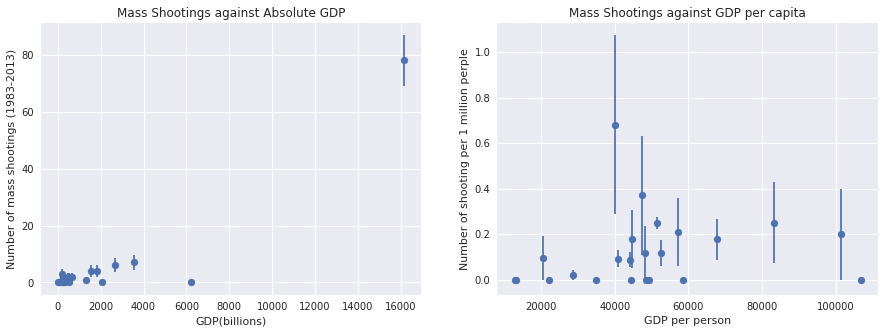

In [142]:
fig = pl.figure(figsize(15,5))
ax1 = fig.add_subplot(121)
pl.title('Mass Shootings against Absolute GDP')

x = df_.gdp/1e9
y = df_['Number of mass shootings (1983-2013)']
ax1.scatter(x,y)
ax1.errorbar(x,y,yerr= np.sqrt(y),fmt='.')
ax1.set_xlabel("GDP(billions)")
ax1.set_ylabel("Number of mass shootings (1983-2013)")

ax2 = fig.add_subplot(122)
pl.title('Mass Shootings against GDP per capita')

x = df_['gdp'] / df_['pop']
y = df_['Number of mass shootings (1983-2013)']
ax2.scatter(x,y/df_['pop']*1e6,label='y')
ax2.errorbar(x, y/df_['pop']*1e6, yerr = np.sqrt(y) / df_['pop']* 1e6, fmt = '.')
ax2.set_xlabel("GDP per person")
ax2.set_ylabel("Number of shooting per 1 million perple")

Figure1: Left figure shows the Number of mass shooting against GDP in billions. The right figure shows the mass shooting against GDP per person with errors representing Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings.
The USA's GDP per person is not a outlier when compared to other countries, but it still has the most number of mass shootings by far.

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [149]:
df_['shootingspp'] = df_["Average total all civilian firearms"] / df_['pop'] 
df_.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),pop,gdp,shootingspp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538190e+12,0.134194
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074520e+11,0.296560
2,Belgium,70.0,1800000.0,Belgium,17.2,2,11128246.0,4.978840e+11,0.161751
3,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824290e+12,0.286326
4,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271490e+11,0.116246


Text(0.5,1,'Average total of civilian firearms per person against GDP with error bars')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


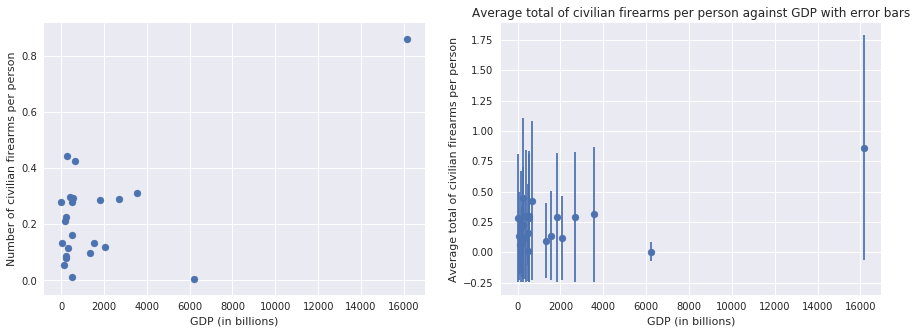

In [154]:
fig = pl.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
x = df_['gdp']/1e9
y = df_['shootingspp']
ax1.scatter(x,y)
pl.xlabel("GDP (in billions)")
pl.ylabel("Number of civilian firearms per person")

ax2 = fig.add_subplot(122)

ax2.scatter(x,y)
ax2.errorbar(x,y,yerr=np.sqrt(y*1.0),fmt='.')
pl.xlabel("GDP (in billions)")
pl.ylabel("Average total of civilian firearms per person")
pl.title('Average total of civilian firearms per person against GDP with error bars')

Figure2.1:The average total number of civilian firearms per person vs. GDP in billions. The point in the top right is the US which has the highest GDP and largest number of civilian firearms per person.

Figure2.2:The average total number of civilian firearms per person against GDP in billions. The point in the top right is the US which has the highest GDP and largest number of civilian firearms per person with error bars. 

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0,0.5,'homicides by firearm per 1000 people')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


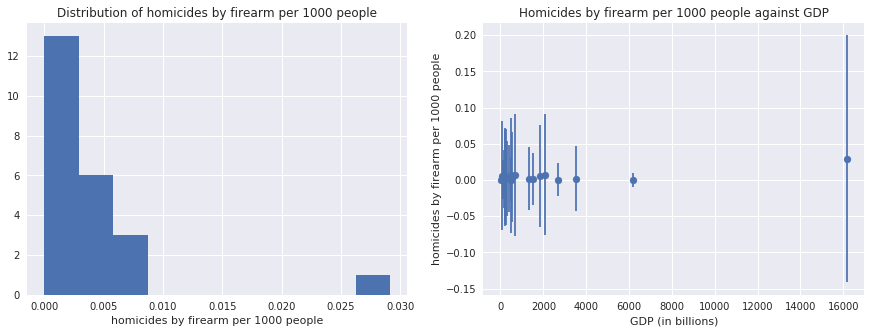

In [174]:

fig = pl.figure(figsize=(15,5))
x,y = df_['gdp']/1e9, df_['Number of homicides by firearm']/df_['pop']*1e3

ax1=fig.add_subplot(121)
ax1.hist(y)
pl.xlabel('homicides by firearm per 1000 people');
pl.title('Distribution of homicides by firearm per 1000 people')

ax2=fig.add_subplot(122)
ax2.scatter(x,y)
ax2.errorbar(x,y,yerr=np.sqrt(y),fmt='.')
pl.title('Homicides by firearm per 1000 people against GDP')
pl.xlabel("GDP (in billions)")
pl.ylabel("homicides by firearm per 1000 people")


Figure 3.1: The figure shows the Average number of homicides by firearms per 1000 people. 
There is one particular country, USA,  that has higher average number of homicides by firearms.

Figure3.2: The figure shows the Average number of homicides per 1000 people against GDP total in billions.
There is no obvious correlation. The outlier is USA,the upper-right point, which has both the highest GDP and the highest number of homicides by firearm.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0,0.5,'Number of homicides by firearms')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


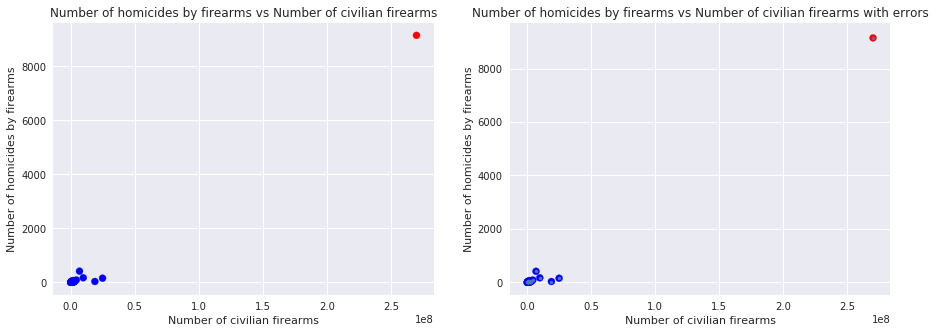

In [212]:
fig = pl.figure(figsize=(15,5))

x = df_['Average total all civilian firearms']
y = df_['Number of homicides by firearm']

ax1 = fig.add_subplot(121)
pl.title('Number of homicides by firearms vs Number of civilian firearms')
colors = (df_['Country/Territory']=='United States').map({0:'b', 1:'r'})
ax1.scatter(x,y,c=colors)
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of homicides by firearms")

ax2 = fig.add_subplot(122)
pl.title('Number of homicides by firearms vs Number of civilian firearms with errors')
ax2.scatter(x,y,c=colors)
ax2.errorbar(x,y,yerr=np.sqrt(y),fmt='.',ecolor=colors)
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of homicides by firearms")

Figure 4: The figure shows the number of homicides by firearms against the number of civilian firearms.The right figure shows the same with errors.
The US is in red color is the outlier, which has both the highest number of civilian firearms and the number of homicides by firearms. 

Since the US is stretching the plots, the errorbars are too small to observe. It is not easy to examine potential correlations.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0.5,1,'Number of mass shootings vs Number of civilian firearms')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


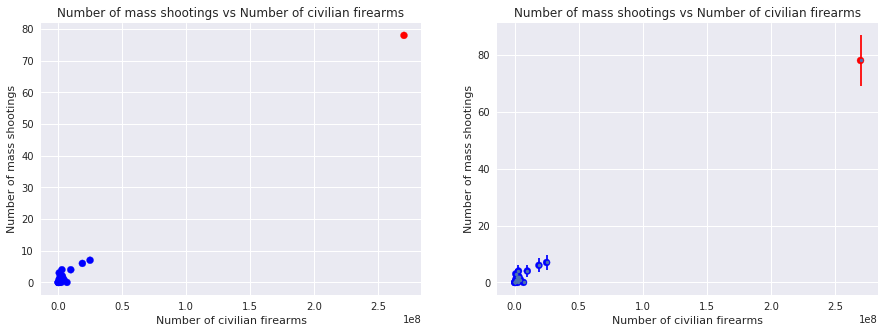

In [211]:
fig = pl.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)

x = df_['Average total all civilian firearms']
y = df_['Number of mass shootings (1983-2013)']
colors = (df_['Country']=='United States').map({0:'b', 1:'r'})
ax1.scatter(x,y,c=colors)
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of mass shootings")
pl.title('Number of mass shootings vs Number of civilian firearms')

ax2 = fig.add_subplot(122)
ax2.scatter(x,y,c=colors)
ax2.errorbar(x,y,yerr=np.sqrt(y*1.0),fmt='.',ecolor=colors)
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of mass shootings")
pl.title('Number of mass shootings vs Number of civilian firearms')

Figure 5: The figures above show the number of mass shootings against the number of civilian firearms. Right figure is plotted with errors.


The US is outlier. There could potentially be a positive correlation between mass shooting and the amount of civilian firearms.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




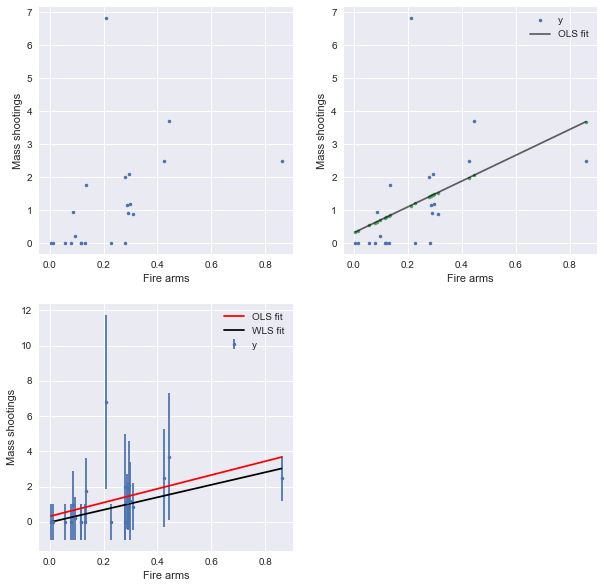

the plots should look something like this (not necessarily exactly, due to the choices of the error


In [229]:
df_['CivFirearmspp'] = df_['Average total all civilian firearms'] / df_['pop']
df_['MassShootpp'] = df_['Number of mass shootings (1983-2013)'] / df_['pop']*1e6

In [230]:
df_['CivFirearmspp'].mean()

0.22602836713176896

In [231]:
df_['MassShootpp'].mean()

0.12357349734552325

In [232]:
#OLS
olsmodel = smf.ols(formula='MassShootpp ~ CivFirearmspp',data =df_).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MassShootpp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.980
Date:                Thu, 08 Nov 2018   Prob (F-statistic):             0.0367
Time:                        21:46:14   Log-Likelihood:                 12.283
No. Observations:                  23   AIC:                            -20.57
Df Residuals:                      21   BIC:                            -18.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0368      0.050      0.741      0.467        -0.066     0.140
CivFirearmspp     0.3837      0.172      2.232      0.037         0.026     0.741
==============================================================================
Omnibus:                       34.555   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.739
Skew:                           2.666   Prob(JB):                     5.38e-20
Kurtosis:                      11.011   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of firearms per person is significant, which is 0.3837. The inference is that each increase of 10 firearms per person is predicting roughly 3 to 4 mass shootings per million people in average.

In [241]:
#WLS

yerr = np.sqrt(df_['MassShootpp'])
yerrremove0 = np.where(yerr==0,0.1,yerr)
wlsmodel = sm.WLS(endog=df_['MassShootpp'],exog=df_['CivFirearmspp'],weights=1/yerrremove0).fit()
wlsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            MassShootpp   R-squared:                       0.405
Model:                            WLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     14.99
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           0.000824
Time:                        22:09:18   Log-Likelihood:                 21.354
No. Observations:                  23   AIC:                            -40.71
Df Residuals:                      22   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
CivFirearmspp     0.3298      0.085      3.872      0.001         0.153     0.507
==============================================================================
Omnibus:                       12.780   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.433
Skew:                           1.241   Prob(JB):                      0.00200
Kurtosis:                       5.610   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Number of mass shootings')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


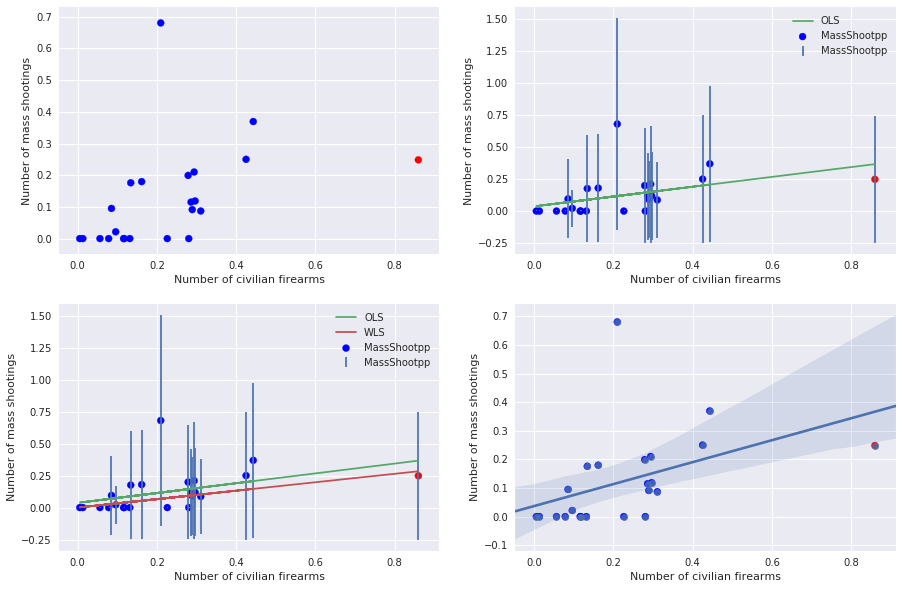

In [252]:
fig = pl.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
x = df_['CivFirearmspp']
y = df_['MassShootpp']
colors = (df_['Country']=='United States').map({0:'b', 1:'r'})
ax1.scatter(x,y, c=colors)
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of mass shootings")

ax2=fig.add_subplot(222)
ax2.scatter(x,y,c=colors)
ax2.errorbar(x,y,yerr=np.sqrt(y),fmt=',')
pl.plot(x,olsmodel.fittedvalues,label='OLS')
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of mass shootings")
pl.legend()

ax3=fig.add_subplot(223)
ax3.scatter(x,y,c=colors)
ax3.errorbar(x,y,yerr=np.sqrt(y),fmt=',')
pl.plot(x,olsmodel.fittedvalues,label='OLS')
pl.plot(x,wlsmodel.fittedvalues,label='WLS')
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of mass shootings")
pl.legend()


#import seaborn as sns sns.regplot(x="x", y="y", data=df);
import seaborn as sns

ax4 = fig.add_subplot(224)
ax4.scatter(x,y,c=colors)
sns.regplot(x,y,data=df_)
pl.xlabel("Number of civilian firearms")
pl.ylabel("Number of mass shootings")

Number of mass shootings per person against Average total all civilian firearms per 1 million person
Use statsmodels OLS to fit the line
Use statsmodels OLS and WLS to fit the line and show the error bar
plot data and a linear regression model fit with seaborn.

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



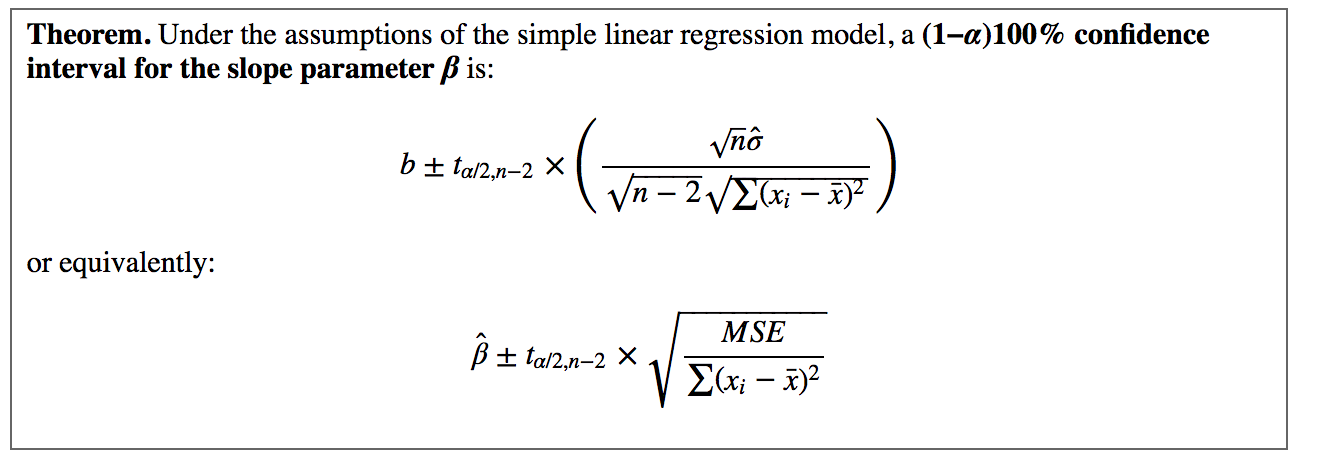

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

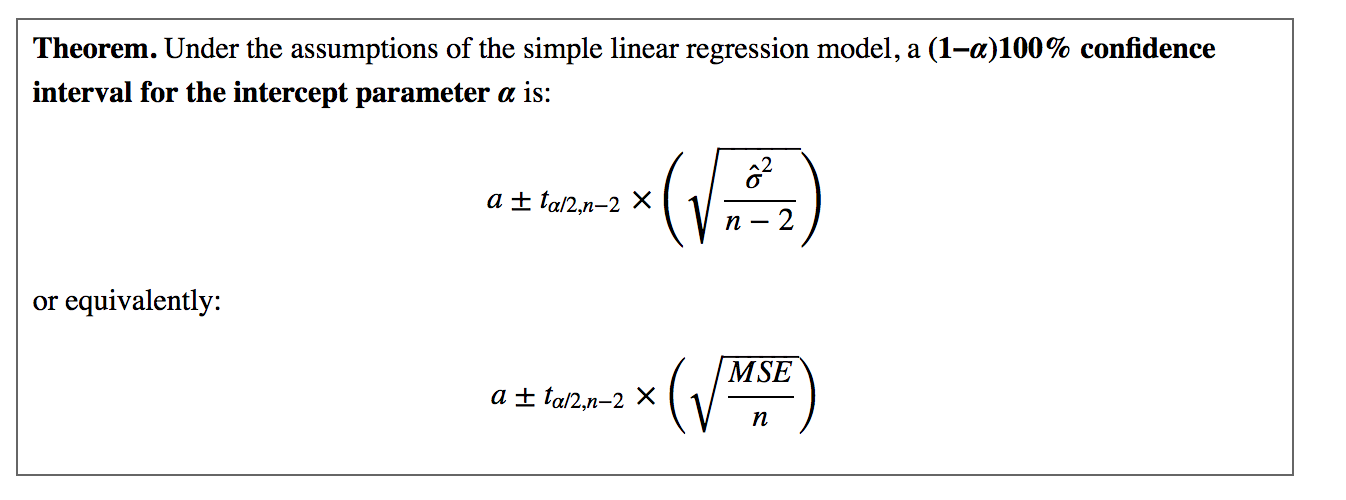

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy tp = sp.stats.t.ppf(0.975, n-2)

In [259]:
x = df_['CivFirearmspp']
y = df_['MassShootpp']
yobserved = df_['MassShootpp']
ypredict = wlsmodel.predict()
n = len(df_)

sigma = np.sqrt(sum((yobserved-ypredict)**2)/n)
tp = scipy.stats.t.ppf(0.975, n-2)

slope = tp*( np.sqrt(n) * sigma / ( np.sqrt(n-2) * np.sqrt(sum((x- y.mean()) ** 2 )) ) )
intercept = tp * np.sqrt(sigma ** 2 / (n-2)) 

print(slope,intercept)

0.329511877107 0.0682504786785


2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

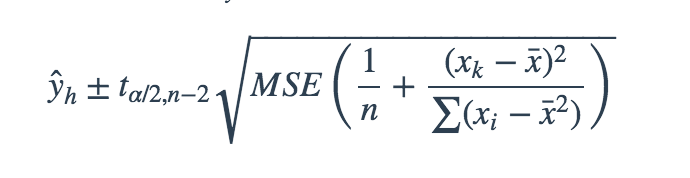

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

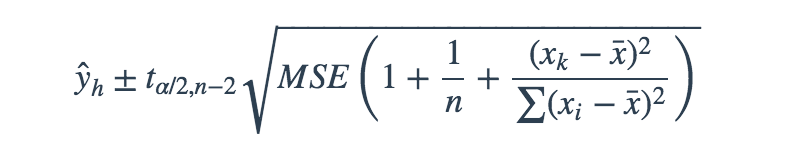

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

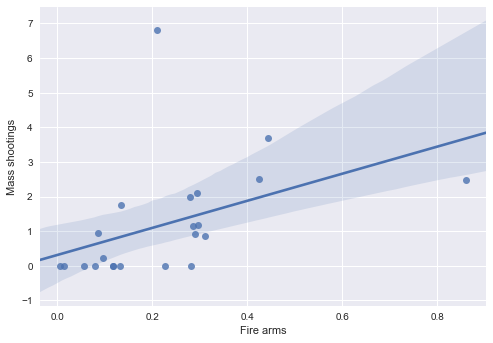

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


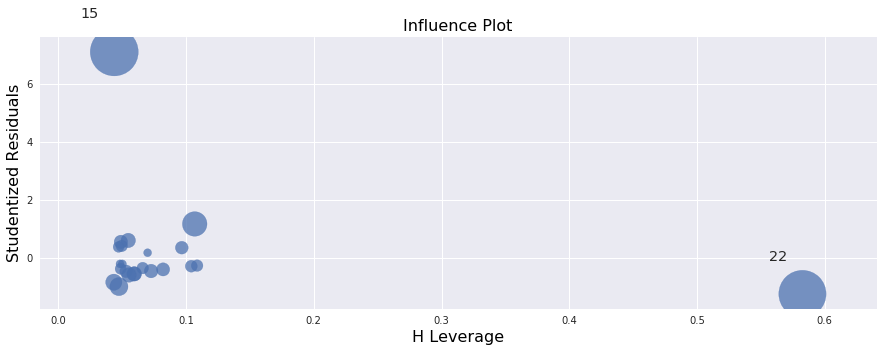

In [253]:
sm.graphics.influence_plot(olsmodel, alpha  = 0.05, criterion="cooks");

In [256]:
df_.iloc[[15, 22]]

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),pop,gdp,shootingspp,CivicFirearmspp,NumMassShootPP,CivicFirearmsPP,CiviFirearmsPP,CivFirearmsPP,CivFirearmspp,MassShootpp
15,New Zealand,7.0,925000.0,New Zealand,22.6,3,4408100.0,1.761930e+11,0.209841,0.209841,6.805653e-07,0.209841,0.209841,0.209841,0.209841,0.680565
22,United States,9146.0,270000000.0,United States,88.8,78,313998379.0,1.615530e+13,0.859877,0.859877,2.484089e-07,0.859877,0.859877,0.859877,0.859877,0.248409


## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings